In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x, y = dataset.iloc[:, 2: -1].values.astype(float), dataset.iloc[:, -1].values.astype(int)

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [6]:
def plotting_kernal(xtest, ytest, kernel_type):
    # Visualising the Test set results
    from matplotlib.colors import ListedColormap
    X_set, y_set = xtest, ytest
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    plt.figure(figsize = (10, 5))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('white', "lightblue")))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    plt.plot(
        xtest[ytest == 0][:, 0], xtest[ytest == 0][:, 1],
        color = "red",
        marker = 'o',
        markeredgecolor = "black",
        markersize = 8,
        linestyle = '',
        label = "Category 0"
    )

    plt.plot(    
        xtest[ytest == 1][:, 0], xtest[ytest == 1][:, 1],
        color = "yellow",
        marker = 'o',
        markeredgecolor = "black",
        markersize = 8,
        linestyle = '',
        label = "Category 1"
    )

    plt.title(f"SVM Calssifier ({kernel_type})", fontsize = 15)
    plt.xlabel(s = "Age", fontsize = 13)
    plt.ylabel(s = "EstimatedSalary", fontsize = 13)
    plt.legend()
    plt.show()

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

### Fitting SVM to the Training set, with linear kernel

In [8]:
classifier = SVC(kernel = "linear")
classifier.fit(xtrain, ytrain)
ypredicted = classifier.predict(xtest)
print("The Accuracy = {0:0.2f}%".format(classifier.score(xtest, ytest) * 100))

The Accuracy = 90.00%


In [9]:
# Making the Confusion Matrix
cm = confusion_matrix(ytest, ypredicted)
print(cm)

[[66  2]
 [ 8 24]]


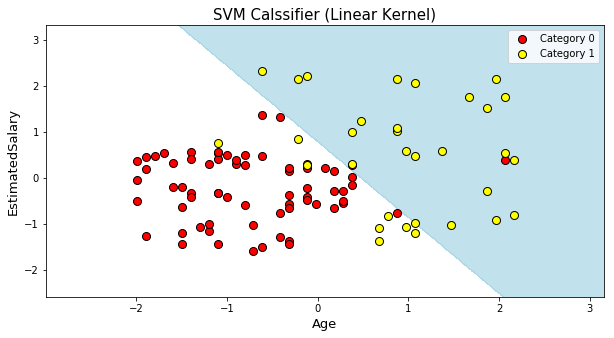

In [10]:
plotting_kernal(xtest, ytest, "Linear Kernel")

### Fitting SVM to the Training set, with Polynomial Kernel

In [11]:
classifier = SVC(kernel = "poly", degree = 3)
classifier.fit(xtrain, ytrain)
ypredicted = classifier.predict(xtest)
print("The Accuracy = {0:0.2f}%".format(classifier.score(xtest, ytest) * 100))

The Accuracy = 86.00%


In [12]:
# Making the Confusion Matrix
cm = confusion_matrix(ytest, ypredicted)
print(cm)

[[67  1]
 [13 19]]


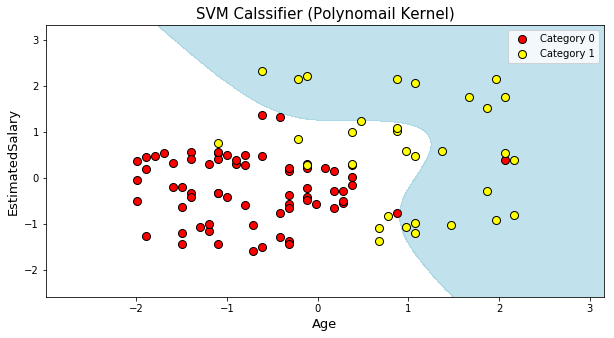

In [13]:
plotting_kernal(xtest, ytest, "Polynomail Kernel")

### Fitting SVM to the Training set, with Gaussian kernel

In [14]:
classifier = SVC(kernel = "rbf")
classifier.fit(xtrain, ytrain)
ypredicted = classifier.predict(xtest)
print("The Accuracy = {0:0.2f}%".format(classifier.score(xtest, ytest) * 100))

The Accuracy = 93.00%


In [15]:
# Making the Confusion Matrix
cm = confusion_matrix(ytest, ypredicted)
print(cm)

[[64  4]
 [ 3 29]]


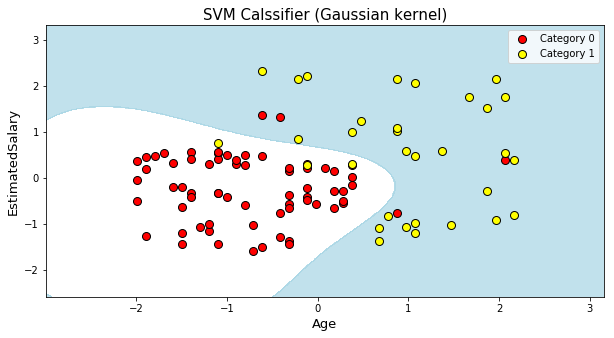

In [16]:
plotting_kernal(xtest, ytest, "Gaussian kernel")